In [ ]:
"""
Purpose: To error out a branch that is doubling back
and its sibling if the angle between two branches is 
wide enough and the branches match in terms of width

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-06-25 01:34:26,610 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-25 01:34:26,612 - settings - Setting database.user to celiib
INFO - 2021-06-25 01:34:26,613 - settings - Setting database.password to newceliipass
INFO - 2021-06-25 01:34:26,614 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-25 01:34:26,615 - settings - Setting database.user to celiib
INFO - 2021-06-25 01:34:26,616 - settings - Setting database.password to newceliipass
INFO - 2021-06-25 01:34:26,620 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-06-25 01:34:27,213 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-25 01:34:27,267 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-25 01:34:27,269 - settings - Setting database.user to celiib
INFO - 2021-06-25 01:34:27,269 - settings - Setting database.password to newceliipass
INFO - 2021-06-25 01:34:27,271 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-25 01:34:27,880 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-25 01:34:27,928 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-25 01:34:27,929 - settings - Setting database.user to celiib
INFO - 2021-06-25 01:34:27,930 - settings - Setting database.password to newceliipass
INFO - 2021-06-25 01:34:27,930 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-25 01:34:27,931 - settings - Setting database.user to celiib
INFO - 2021-06-25 01:34:27,932 - settings - Setting database.pa

In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-06-25 01:34:28,858 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-25 01:34:28,860 - settings - Setting database.user to celiib
INFO - 2021-06-25 01:34:28,861 - settings - Setting database.password to newceliipass
INFO - 2021-06-25 01:34:28,863 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-25 01:34:29,621 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Pulling Down a Neuron

In [92]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(864691135212632448)

**Using table __decomposition_cell_type for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Number of Neurons found = 1


In [93]:
neuron_obj = neuron_objs[0]

limb_name = L4
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


No limb name was given so using L4 because was the limb in the first key


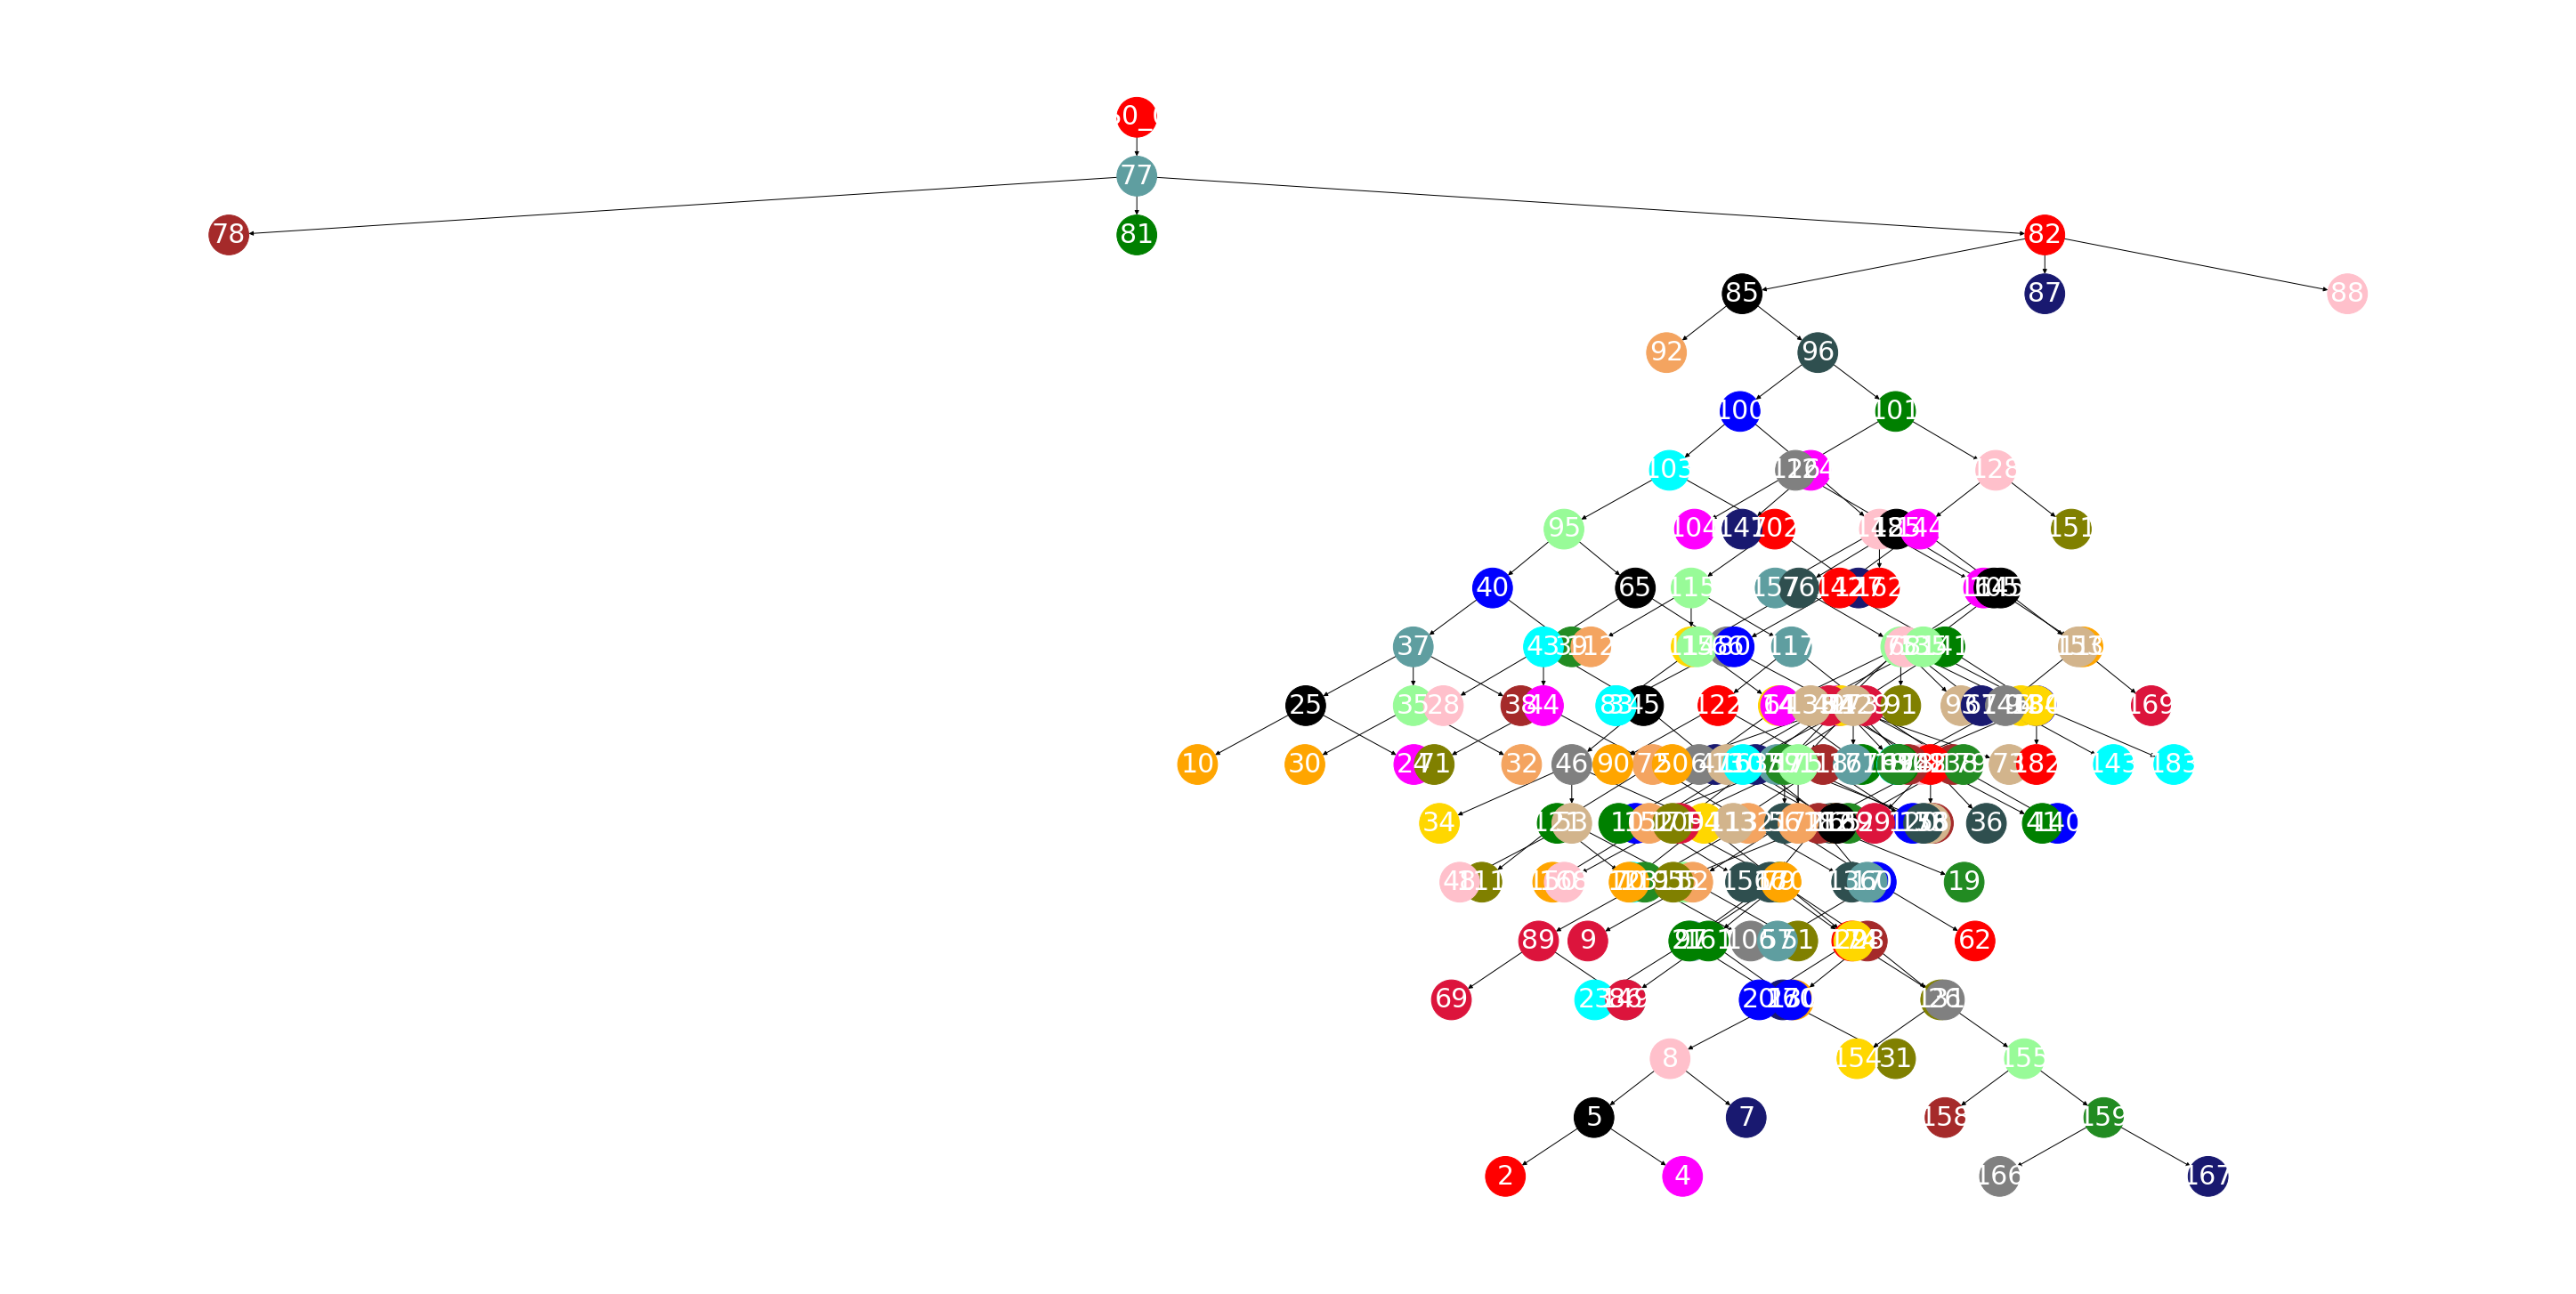

In [94]:
nviz.visualize_neuron_specific_limb(neuron_obj,
               neuron_obj.axon_limb_idx)

In [107]:
neuron_obj = syu.add_synapses_to_neuron_obj(neuron_obj,
                            validation = True,
                            verbose  = True,
                            original_mesh = None,
                            plot_valid_error_synapses = False,
                            calculate_synapse_soma_distance = False,
                            add_valid_synapses = True,
                              add_error_synapses=False)


---Step 1: Computing synapse_dict---
# of beginning_direct_connections = 3779 
# of presyn: 416
# of postsyn: 3363

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 1
# of valid_syn_idx = 415
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 24
# of valid_syn_idx = 3339

---Step 3: add_valid_synapses_to_neuron_obj---
Synapse dict: 0.0014
Original Mesh: 0.6331
Closest Branch: 9.0274
Closest Skeleton Branch and distance from endpoint: 13.7439
Closest Branch: 8.6101
Closest Skeleton Branch and distance from endpoint: 90.23
Total time for valid synapse objects = 0.04300808906555176


# Downstream Synapses

In [108]:
limb_obj = neuron_obj[4]

In [109]:
branch_idx = 16
branch_obj = limb_obj[branch_idx]

In [110]:
branch_obj.synapses[0].export()

{'syn_type': 'presyn',
 'syn_id': 161098838,
 'volume': 12616,
 'endpoints_dist': array([6093.43303187, 5530.09811211]),
 'upstream_dist': 6093.4330318657485,
 'downstream_dist': 5530.098112109597,
 'coordinate': array([717212, 793604, 882880]),
 'closest_sk_coordinate': array([717069.82467344, 793876.97658797, 883431.33498413]),
 'closest_face_idx': 782725,
 'closest_face_dist': 30.77706577595969,
 'closest_face_coordinate': array([717226.        , 793611.36666667, 882906.4       ]),
 'soma_distance': None}

In [175]:
import axon_utils as au
short_thick_branches = au.short_thick_branches_limb_branch_dict(neuron_obj)
axon_spines = au.axon_spines_limb_branch_dict(neuron_obj)
nodes_to_skip = nru.limb_branch_union([short_thick_branches,axon_spines])
nodes_to_skip

{'L4': array([  4,  12,  31,  36,  38,  47,  51,  61,  63,  70,  78,  81,  86,
         87,  88,  92,  97, 106, 111, 113, 130, 134, 137, 143, 154, 160,
        166, 168, 177, 181, 182])}

# How to get those to error

In [259]:
import neuron_searching as ns
nodes_to_exclude = nodes_to_skip[neuron_obj.axon_limb_name]

limb_branch_close_syn = ns.query_neuron(neuron_obj,
               functions_list=["min_synapse_dist_to_branch_point","n_downstream_nodes","axon_width"],
                                        function_kwargs=dict(nodes_to_exclude=nodes_to_exclude),
               query="(min_synapse_dist_to_branch_point < 900) and (n_downstream_nodes > 1) and (axon_width < 150)",
                                       limb_branch_dict_restriction=nru.limb_branch_setdiff([neuron_obj.axon_limb_branch_dict,
                                                                                             nodes_to_skip]),)

print(f"limb_branch_close_syn = {limb_branch_close_syn}")

limb_branch_close_syn = {'L4': array([ 18,  75,  76,  84, 142])}


limb_name = L4
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


No limb name was given so using L4 because was the limb in the first key


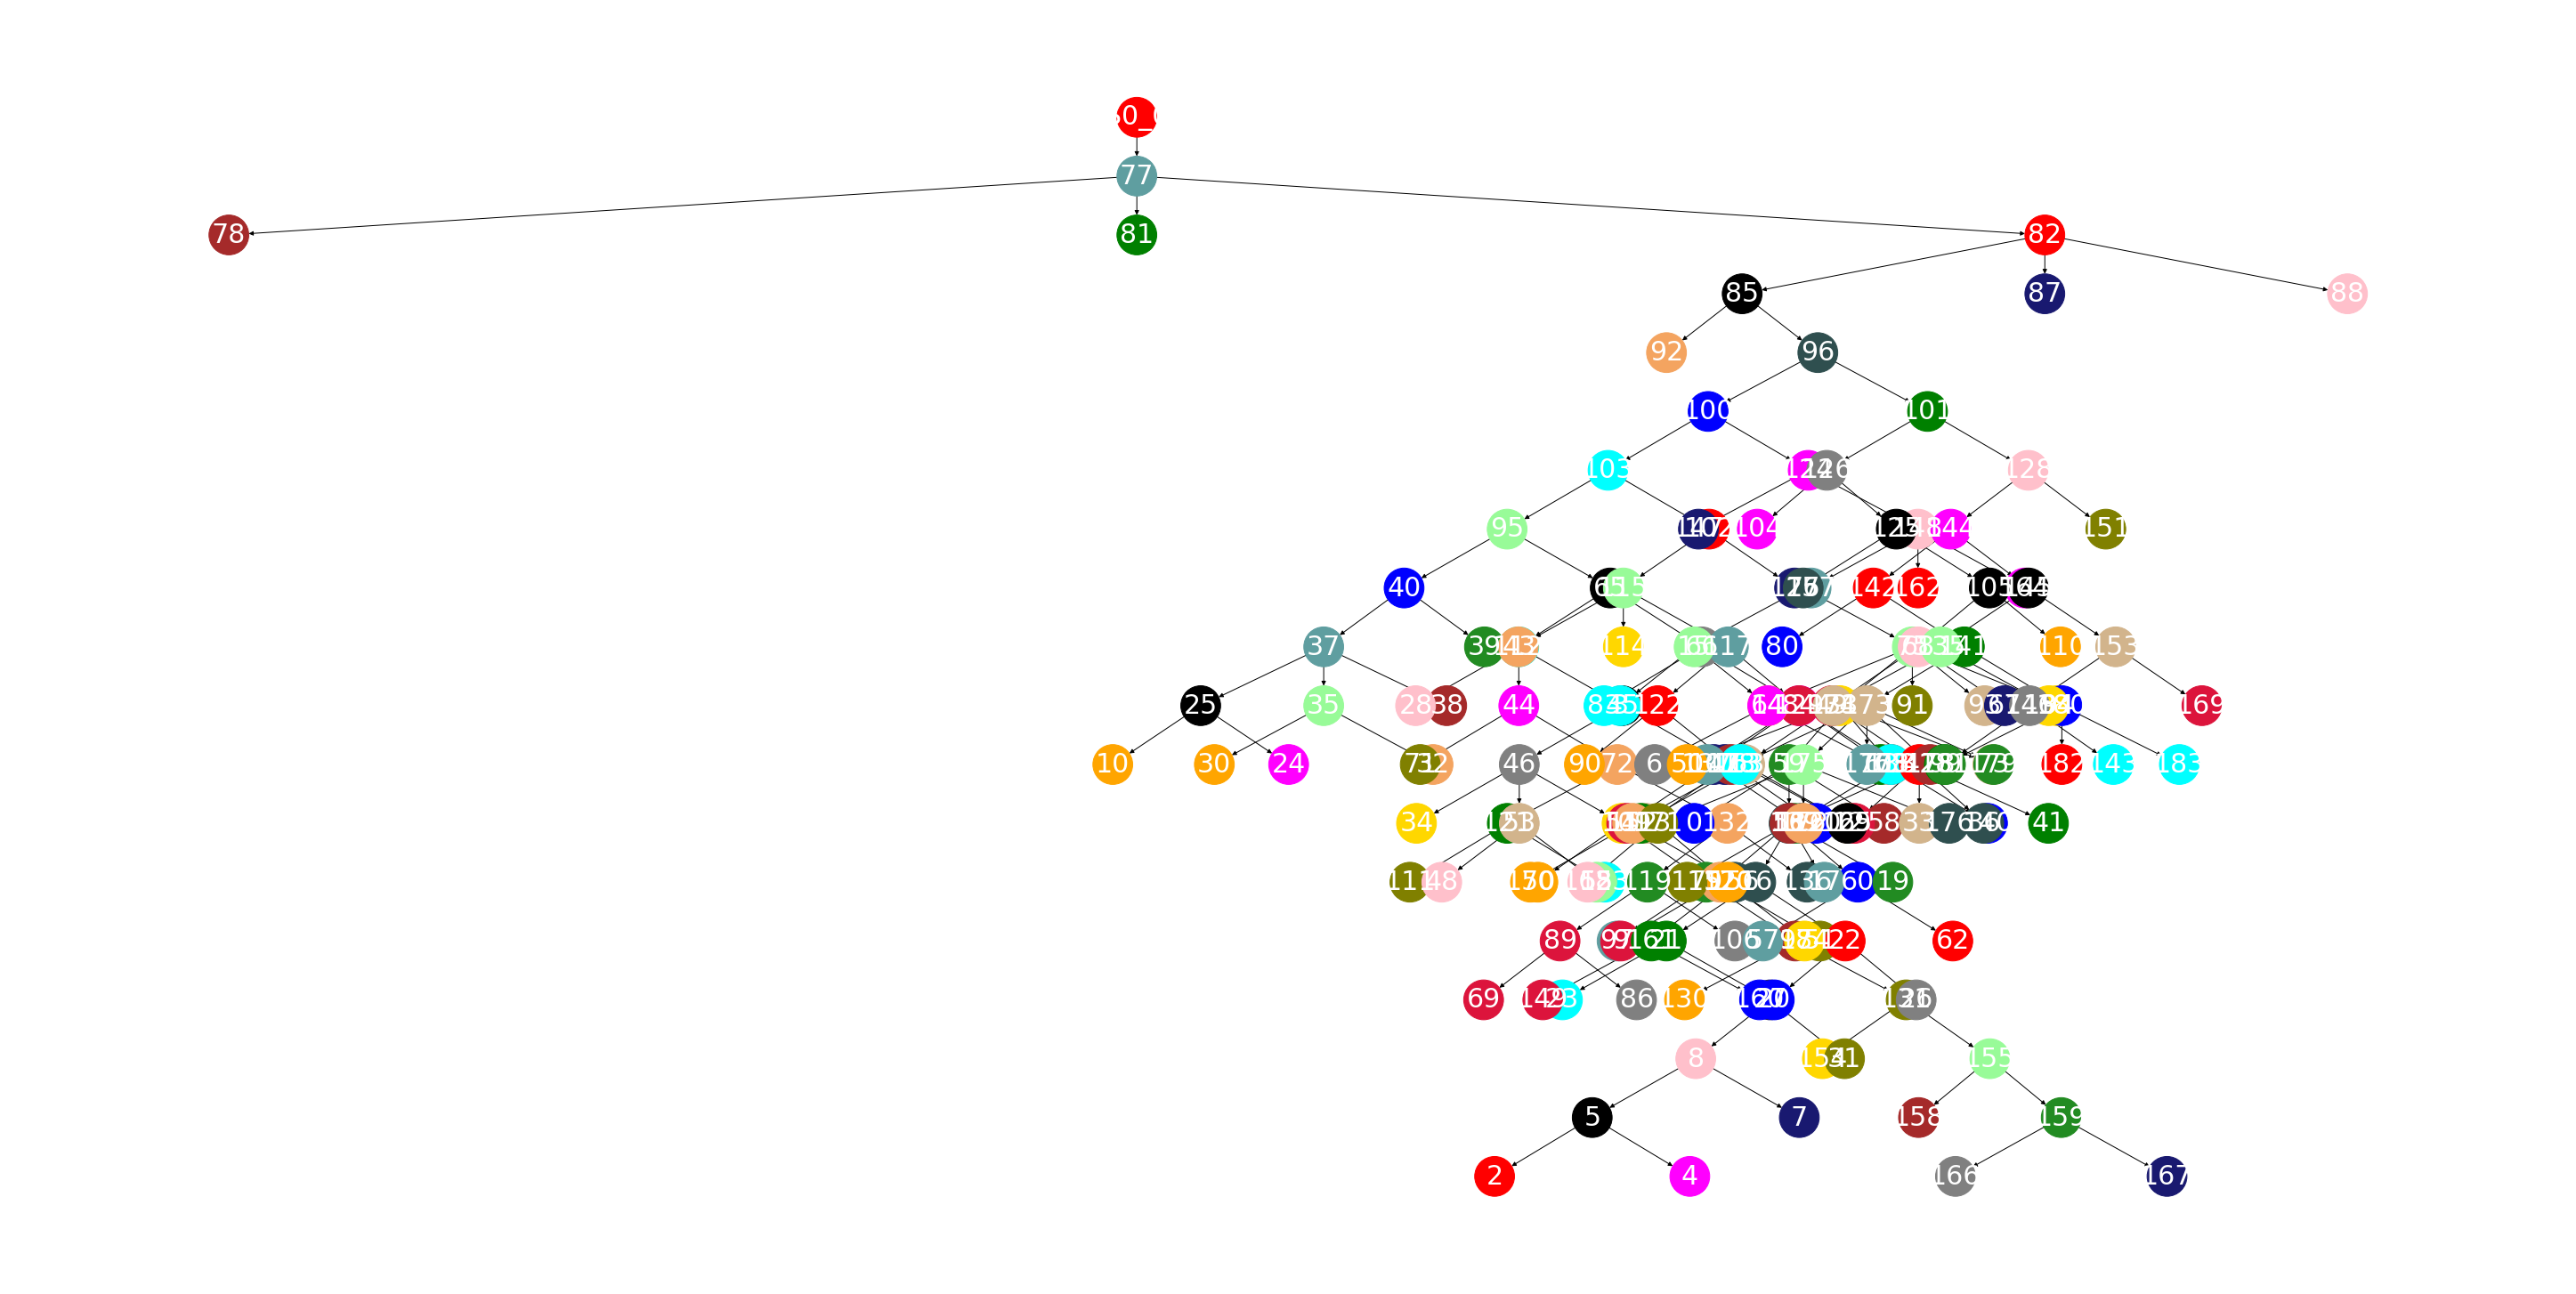

In [260]:
nviz.visualize_neuron_specific_limb(neuron_obj,
                                   "L4")

In [178]:
nviz.plot_limb_path(neuron_obj[4],
                          [  75, 183])

In [201]:
short_thick_branches

{'L4': array([  4,  12,  36,  38,  47,  51,  70,  78,  81,  87,  88,  92,  97,
        106, 111, 113, 130, 134, 137, 154, 160, 166, 177, 182])}

In [ ]:
maybe_good_with_piece_attached_to_upstream_bouton = [35,64]
intersection_to_downstream_bouton = [75]
good_catches = [84,142]
should_be_filtered_away_part_large_thick_endnode = [82]
should_be_filtered_away_spine = [98]
could_be_valid_split_with_bouton = [76]

In [207]:
nviz.plot_branch_with_neighbors(limb_obj,98,nru.downstream_nodes(limb_obj,98))

In [208]:
nru.downstream_nodes(limb_obj,98)

array([130, 131])

In [204]:
au.axon_width(branch_obj)

197.6172252723445

In [213]:
limb_obj[130].synapses_pre

In [253]:
au.axon_spines_limb_branch_dict(neuron_obj)

{'L4': array([  4,  12,  31,  36,  47,  51,  61,  63,  70,  86,  97, 106, 111,
        130, 134, 137, 143, 154, 160, 166, 168, 181, 182])}

In [250]:
ray_trace_min = 270
ray_trace_max = 1200
skeletal_length_min = 1000
skeletal_length_max = 6000
n_synapses_pre_min = 1
n_synapses_pre_max = 3
n_faces_min = 90

df = ns.query_neuron(neuron_obj,
                   functions_list=["ray_trace_perc","skeletal_length","n_downstream_nodes",
                                  "n_synapses_post","n_synapses_pre","n_faces_branch"],
                   query=(f"(ray_trace_perc >= {ray_trace_min}) and "
                          f"(ray_trace_perc <= {ray_trace_max}) and "
                          f"(skeletal_length >= {skeletal_length_min}) and "
                          f"(skeletal_length <= {skeletal_length_max}) and "
                          f"(n_synapses_post == {0}) and "
                          f"(n_synapses_pre >= {n_synapses_pre_min}) and "
                          f"(n_synapses_pre <= {n_synapses_pre_max}) and "
                          f"(n_faces_branch >= {n_faces_min}) and "
                          f"(n_downstream_nodes == 0)"
                         ),
#                 query = (f"(ray_trace_perc >= {ray_trace_min}) and "
#                           f"(ray_trace_perc <= {ray_trace_max}) and "
#                           f"(skeletal_length >= {skeletal_length_min}) and"
#                          f"(skeletal_length <= {skeletal_length_max}) and "
#                          f"(n_synapses_post == {0}) and "
#                          f"(n_synapses_pre >= {n_synapses_pre_min}) and "
#                          f"(n_synapses_pre <= {n_synapses_pre_max})and  "
#                          f"(n_faces_branch >= {n_faces_min})and "
#                          f"(n_downstream_nodes == 0)"
#                         ),
                return_dataframe=True,
                limb_branch_dict_restriction=dict(L4=[130]))
df 

,limb,node,ray_trace_perc,skeletal_length,n_downstream_nodes,n_synapses_post,n_synapses_pre,n_faces_branch
0,L4,130,719.973902,1749.769738,0,0,3,194


In [224]:
neuron_obj[4][130].skeletal_length

1749.7697381941744

In [223]:
nst.ray_trace_perc(neuron_obj[4][130])

720.135340402818

In [209]:
branch_obj = limb_obj[130]
nviz.plot_branches_with_boutons(branch_obj)

No boutons to plot

width = {'median_mesh_center': 266.53128523090174, 'no_spine_median_mesh_center': 266.53128523090174, 'no_bouton_median': 266.53128523090174}, 
n_boutons = 0,
skeleton_length (in microns) = 1.7497697381941744
area = 2.4398903266262333
n_synapses = 3, 85% width = 719.9576152503051
n_faces = 194


In [210]:
nst.min_synapse_dist_to_branch_point(limb_obj,
        branch_idx = 98,
        downstream_distance = 0,
        default_value = np.inf,
        plot_closest_synapse = True,
        verbose = True)

upstream_dist from downstreams = [963.5655259203613, 1742.6226762207389, 1163.5655259203982, 299.4892494707227, 4218.028118489156]
downstream_dist from current node = []
All distances: [ 963.56552592 1742.62267622 1163.56552592  299.48924947 4218.02811849]
min_distance_from_branch_point: 299.4892494707227


299.4892494707227

In [61]:
minnie.DecompositionCellType()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,allen_e_i,allen_e_i_n_nuc,allen_cell_type,allen_cell_type_n_nuc,allen_cell_type_e_i,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,cell_type_for_axon,axon_volume volume of the oriented bounding box of axon (divided by 10^14),axon_length length (in um) of the classified axon skeleton,axon_branch_length_median length (in um) of the classified axon skeleton,axon_branch_length_mean length (in um) of the classified axon skeleton,axon_n_branches,axon_n_short_branches,axon_n_long_branches,axon_n_medium_branches,axon_bbox_x_min,axon_bbox_y_min,axon_bbox_z_min,axon_bbox_x_max,axon_bbox_y_max,axon_bbox_z_max,axon_bbox_x_min_soma_relative,axon_bbox_y_min_soma_relative,axon_bbox_z_min_soma_relative,axon_bbox_x_max_soma_relative,axon_bbox_y_max_soma_relative,axon_bbox_z_max_soma_relative,run_time the amount of time to run (seconds)
864691134988385914,0,0.25,30.00,5,0,0,6,=BLOB=,610607,12260.15,1,1,excitatory,densely_spined,1,1,166.32176177458544,0.0004958699646598768,0,1112802.6425228184,60,1888801.5329428245,excitatory,1,None,None,None,0.0,0.0,excitatory,1017.1908875511735,2077.7584374888374,8.80683277733624,29.68226339269768,70,26,6,38,1193651.4138548293,429508.5806022349,522108.7649461699,1440289.6219283065,1060078.232233446,1176155.8877907617,-193392.46151859942,-73947.33616682998,-325572.0027670375,53245.74655487784,556622.3154643811,328475.12007755425,329.36
864691134988385914,0,0.25,30.00,5,0,1,6,=BLOB=,610607,1401.24,1,1,excitatory,densely_spined,1,0,171.0319294846302,0.0007133259607713956,0,418676.15770513995,40,940619.5929469143,excitatory,1,None,None,None,0.0,0.0,excitatory,187.8039963250148,1607.1076036830723,6.281401625586479,15.75595689885365,102,49,2,51,1283838.7017211474,469608.0888050826,773279.0359224229,1443341.0082371572,1037049.4954368536,980778.4326581849,-98608.95131782768,-25317.325933265616,-68684.98314271902,60893.355198182166,542124.0806985054,138814.413593043,204.74
864691134988386682,0,0.25,30.00,7,0,0,6,=BLOB=,269380,1067.32,1,1,excitatory,densely_spined,1,0,136.20429783298385,0.0003973503610348998,0,2356426.512289788,46,2840861.4322549435,excitatory,1,5P_IT,1,excitatory,0.0,0.0,excitatory,218.24937591197695,1976.87370

In [30]:
import numpy_utils as nu

In [40]:
import synapse_utils as syu
syu.synapse_endpoint_dist_upstream_downstream(limb_obj,
                                         branch_idx = 16,
                                         direction="downstream",
                                         verbose = True)

using direction downstream, endpoint_idx = 1
dist_from_endpoint = [5530.09811211 6704.29139734 4752.5007312 ]


array([5530.09811211, 6704.29139734, 4752.5007312 ])

In [43]:
syu.synapse_endpoint_dist_upstream(limb_obj,
                                         branch_idx = 16,
                                         verbose = True)

using direction upstream, endpoint_idx = 0
dist_from_endpoint = [6093.43303187 4919.23974663 6871.03041277]


array([6093.43303187, 4919.23974663, 6871.03041277])

In [21]:
import neuron_searching as ns
ns.query_neuron(neuron_obj,
                functions_list=["n_synapses","n_downstream_nodes"],
                query = "(n_synapses > 2) and (n_downstream_nodes>1)",
               limb_branch_dict_restriction=neuron_obj.axon_limb_branch_dict)

{'L4': array([ 16,  18,  43, 141, 152, 161, 173])}

# Work on Dowstream Attributes

In [ ]:
limb_obj = neuron_obj[neuron_obj.axon_limb_name]

In [ ]:
import synapse_utils as syu
syu.soma_synapses_to_scatter_info()

In [ ]:
limb_obj.synapses

In [ ]:
syu.synapses_pre(limb_obj.synapses)

In [ ]:
skel = nst.downstream_skeleton(limb_obj,
                    96,
                           only_non_branching_downstream = False,
                           downstream_distance = 40000,
                               plot_skeleton=True
                   )

In [ ]:
nviz.plot_objects(skeletons=[down_attr_concat])

In [ ]:
import networkx_utils as xu
import neuron_utils as nru

In [ ]:
nru.downstream_nodes(limb_obj,branch_idx)

In [ ]:
limb_obj.get_branch_names

In [ ]:


downstream_nodes_without_branching(limb_obj,96)